# Predicting Heart Disease risk using combined UCI data and machine learning 

## Authors
**Stratoudakis Alexandros<br>
Kazantzakis Nikolaos<br>
Kotsa Christina**<br>

#### Fall 2021<br>
Final group project of the course "Introduction to Data Science and Machine Learning I" that was undertaken during the fall semester of 2021.<br>
*Instructor: Prof. G.P. Tsironis* <br>
*University of Crete, Physics Department, Greece*

## Table of contents

1. Introduction
2. Setup
3. Pre-processing<br>
&nbsp;3.1 Data Exploration<br>
&nbsp;3.2 Data Transformation<br>
&nbsp;3.3 Data Visualization<br>
&nbsp;3.4 Scaling
4. Models' Training<br>
&nbsp;4.1 Models with default hyperparameters<br>
&nbsp;&emsp;4.1.1 Models' Training and evaluation<br>
&nbsp;&emsp;4.1.2 Voting Classifier<br>
&nbsp;4.2 Models with fine-tuned hyperparameters<br>
&nbsp;&emsp;4.2.1 Fine-tuning of hyperparameters<br>
&nbsp;&emsp;4.2.2 Fine-Tuned Models' Training and evaluation<br>
&nbsp;&emsp;4.2.3 Fine-Tuned Voting Classifier<br>
5. Conclusion

## 1. Introduction

Heart disease is the number one cause of death globally (except Africa). It is estimeted that up to 90% of heart disease is preventable. It is ,therefore, very important to develop methods of prevention for such cases. In this project we use a combined dataset (fedesoriano. (September 2021). Heart Failure Prediction Dataset. Retrieved  from https://www.kaggle.com/fedesoriano/heart-failure-prediction) to create machine learning models that can predict heart disease risk based on a patient's results to simple medical tests. <br>

## 2. Setup

In [1]:
#common imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report
import seaborn as sns
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize = 14)
mpl.rc('xtick', labelsize = 12)
mpl.rc('ytick', labelsize = 12)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message = "^internal gelsd")


In [2]:
data= pd.read_csv("heart.csv", thousands=',')#Load the data

## 3. Pre-processing

### 3.1 Data Exploration

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


The #12 column is our target variable; 1 stands for the existence of heart disease and 0 for the absence of it. The 11 remaining columns are our features. There are 918 instances and no missing values.

In [4]:
np.mean(data[["HeartDisease"]])

HeartDisease    0.553377
dtype: float64

The dataset is slightly imbalanced in favor of patients with heart disease.

In [5]:
data.head(15) #Let us take a look on the data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


### 3.2 Data Transformation

Some features are qualitative variables. For our machine learning algorithms to work, we will transform them to quantitative variables by assigning integers to each possible value. In addition, we observe that the 'Cholesterol' feature has some 'zero' values (that represent null values). For our purposes, we shall leave them as they are, as it helps with performance

In [6]:
#Digitize the data
sexmap={'M':1,'F':0}
chestpainmap={'ATA':1,'TA':0,'NAP':2,'ASY':6}
restingecgmap={'Normal':0,'ST':1,'LVH':2} #Dictionaries of our chosen digitization
exanginamap={'N':0,'Y':1}
stslopemap={'Up':2,'Flat':1,'Down':0}
datadig=data.replace({'Sex': sexmap,'ChestPainType': chestpainmap,'RestingECG':restingecgmap,'ExerciseAngina':exanginamap,'ST_Slope':stslopemap})


In [7]:
datadig  #see how the qualificatives have been quantified.

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,0,172,0,0.0,2,0
1,49,0,2,160,180,0,0,156,0,1.0,1,1
2,37,1,1,130,283,0,1,98,0,0.0,2,0
3,48,0,6,138,214,0,0,108,1,1.5,1,1
4,54,1,2,150,195,0,0,122,0,0.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,0,110,264,0,0,132,0,1.2,1,1
914,68,1,6,144,193,1,0,141,0,3.4,1,1
915,57,1,6,130,131,0,0,115,1,1.2,1,1
916,57,0,1,130,236,0,2,174,0,0.0,1,1


In [8]:
target="HeartDisease"
x=datadig.drop(target,axis=1) #pands dataframe of features
y=datadig[target] #column vector of target variable

In [9]:
from sklearn.model_selection import train_test_split #split 'em all
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2,random_state=42) #train-test ratio: 80-20.

### 3.3 Data Visualization

Now we shall create a correlation matrix to see how our features correlate with our target variable and with each other.

<AxesSubplot:>

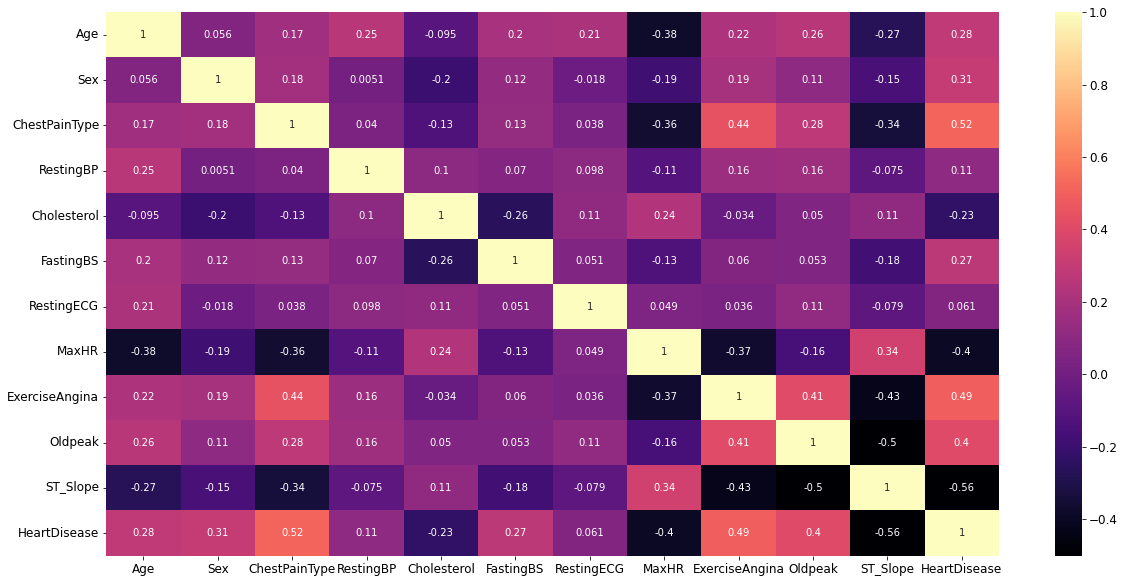

In [10]:
#dc=np.abs(datadig.corr())
dc=datadig.corr()
plt.figure(figsize=(20, 10))
sns.heatmap(dc,robust=True,cmap='magma',annot=True)

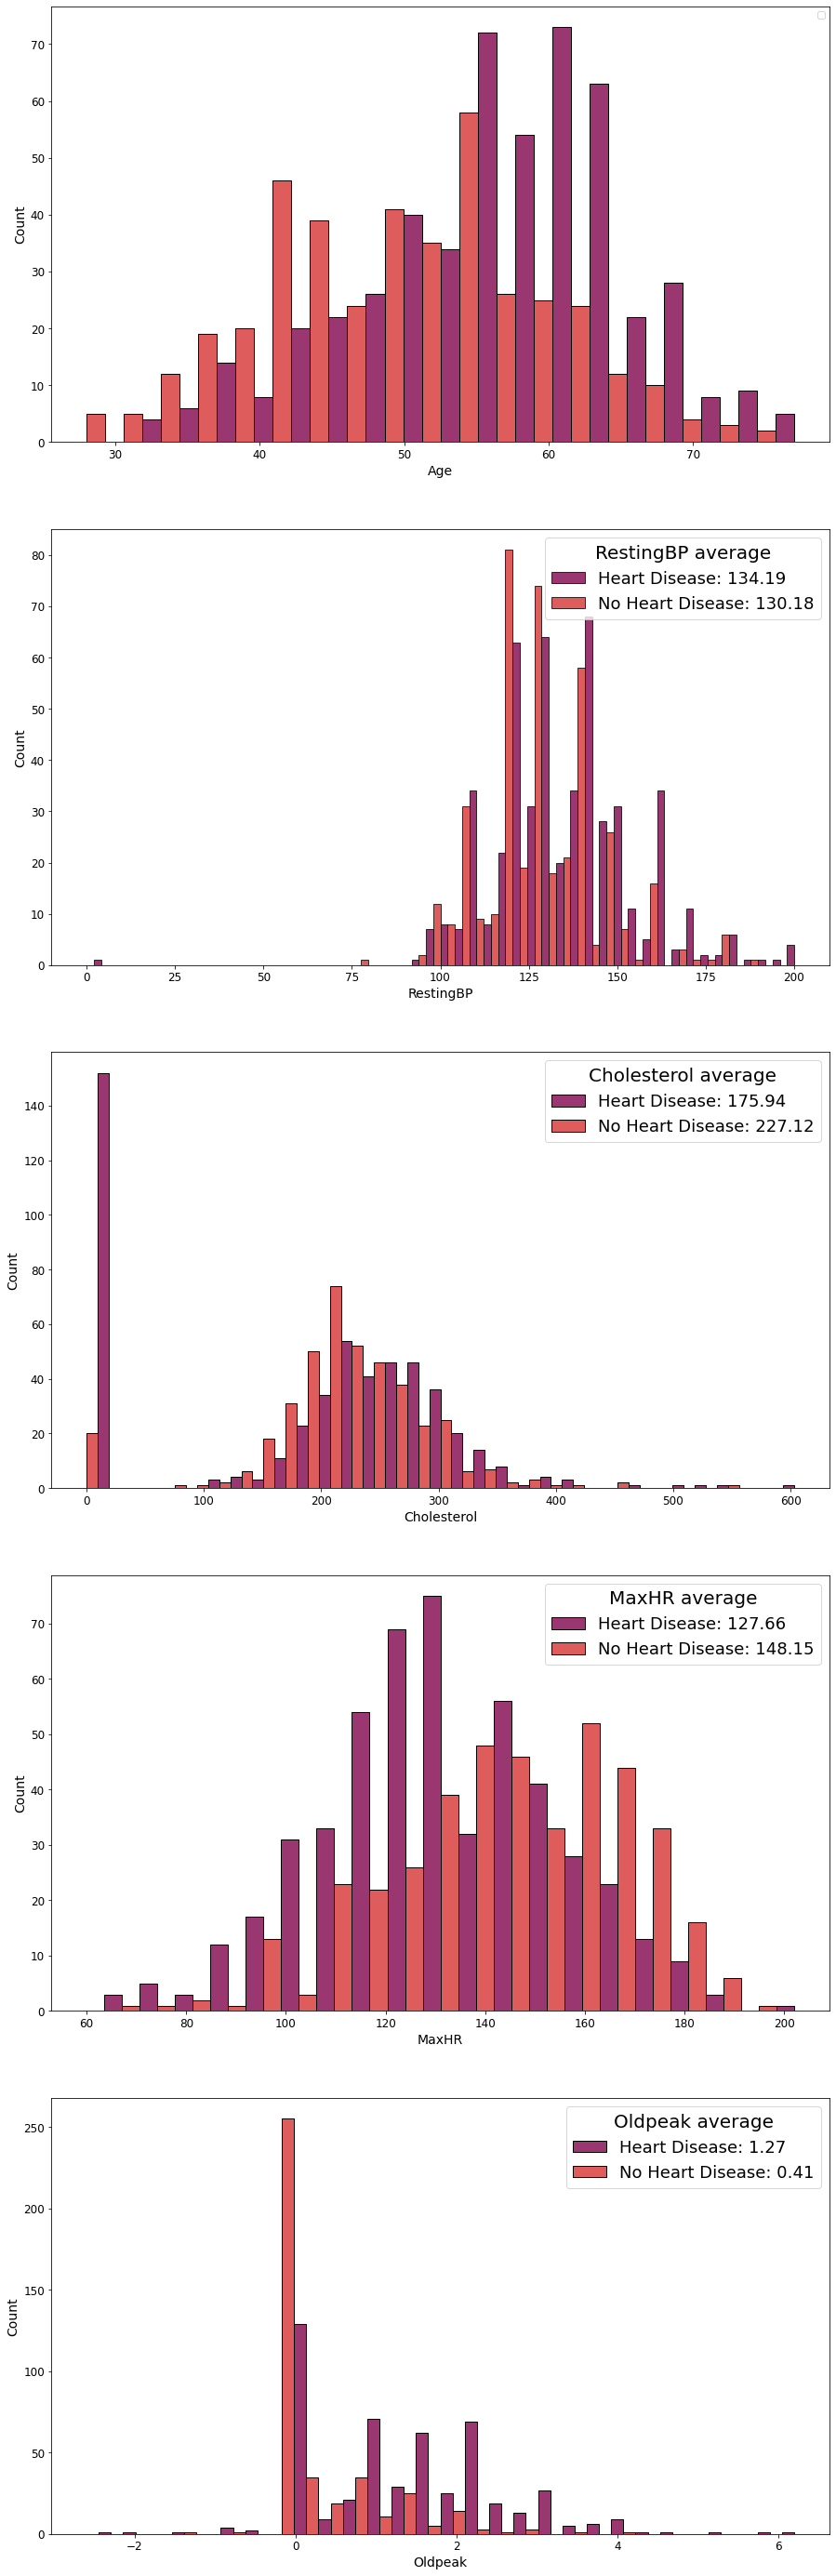

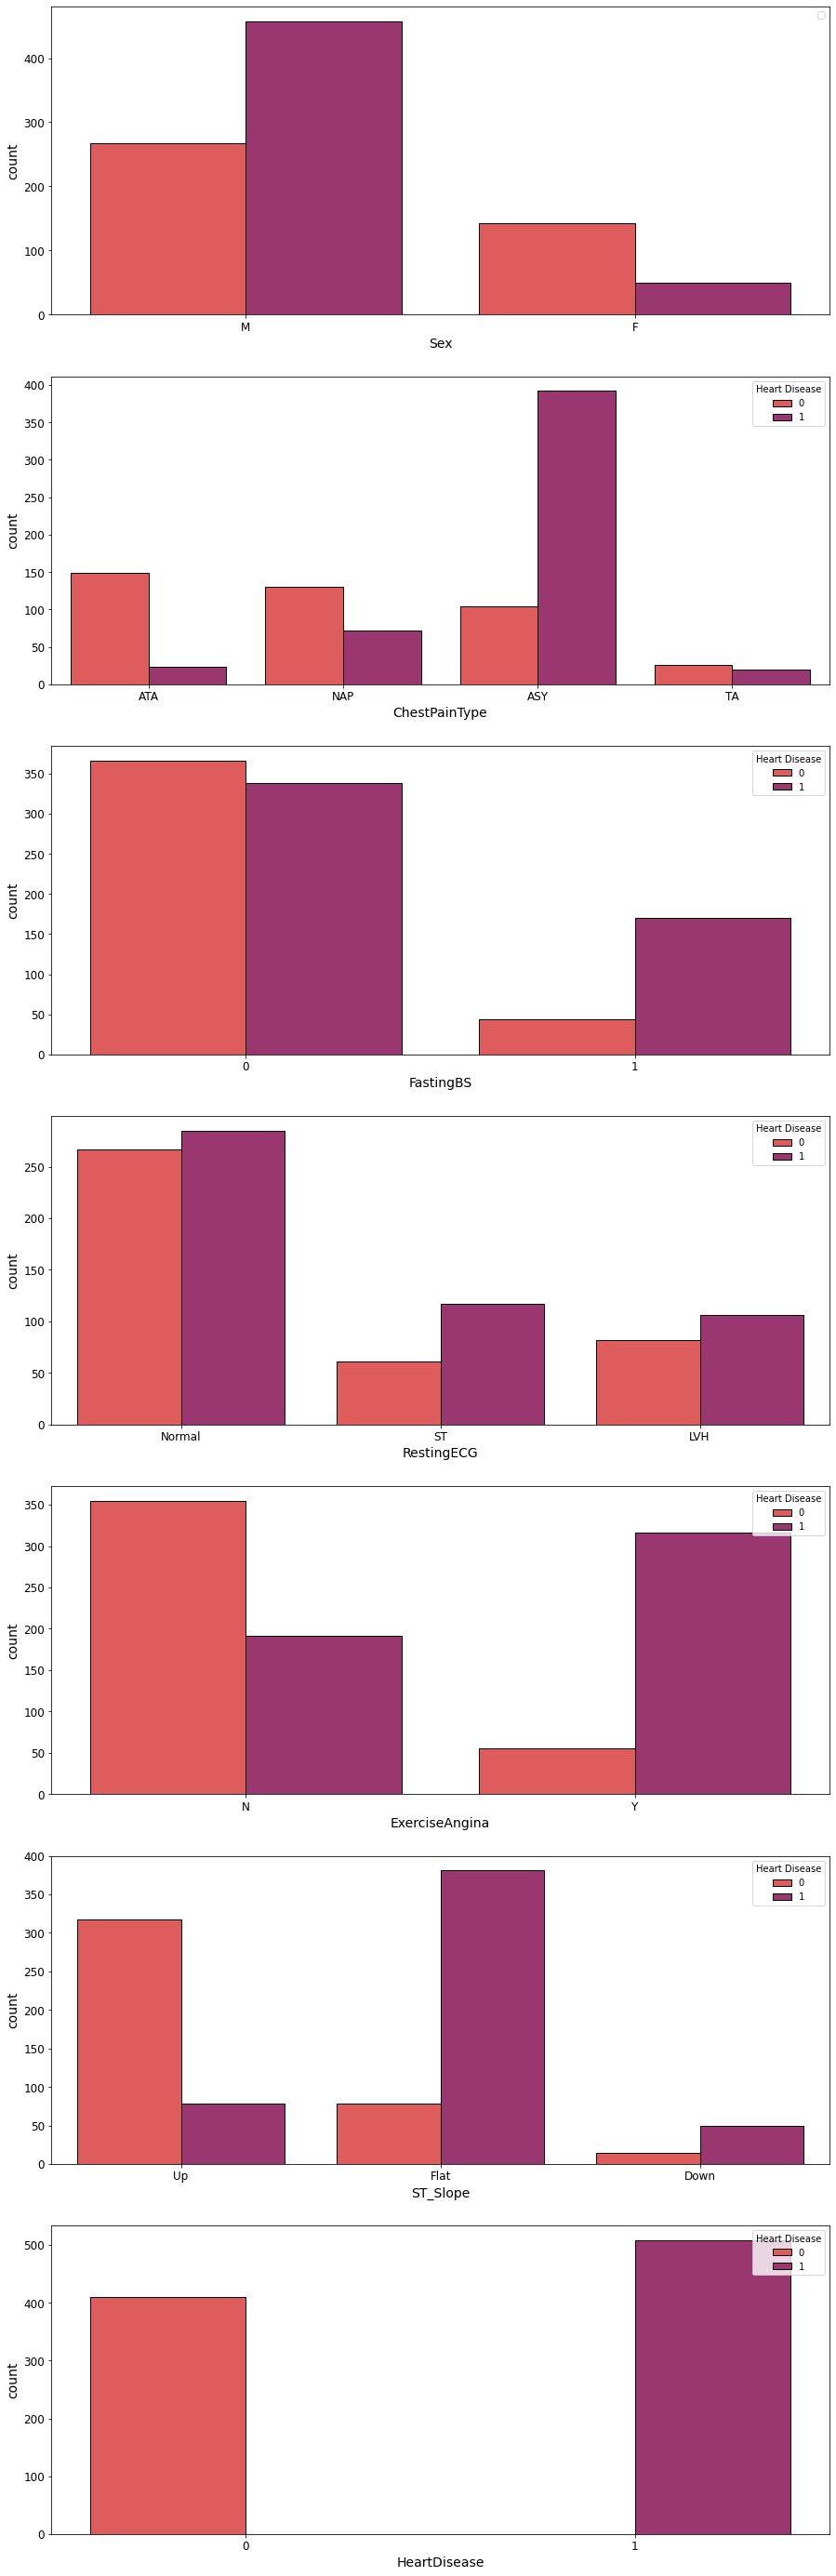

In [11]:
cols2=['Age','RestingBP','Cholesterol', 'MaxHR','Oldpeak']
cols1=[i for i in datadig.columns if i not in cols2]

fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(15,50))
for i in range(len(cols2)):
        col = cols2[i]
        sns.histplot(x=col, data=data, hue=target, multiple="dodge", palette="flare", alpha=1, ax=axes[i])
        axes[i].legend([f"Heart Disease: {datadig[datadig[target]==1.0][col].mean():.2f}", 
                        f"No Heart Disease: {datadig[datadig[target]==0.0][col].mean():.2f}"],
                   fontsize=18,
                   title=f"{col} average",
                   title_fontsize=20,
                   loc ='upper right')
axes[0].legend([])
plt.show()
fig,axes=plt.subplots(nrows=7, ncols=1, figsize=(15,50))
for i in range(len(cols1)):
        col = cols1[i]
        sns.countplot(x=col, data=data, hue=target, palette="flare",saturation=1,linewidth=1,ax=axes[i], edgecolor='black')
        axes[i].legend(title='Heart Disease', loc ='upper right')
axes[0].legend([])
plt.show()

### 3.4 Scaling

For our machine learning algorithms to work, we need to scale the data.

In [12]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(xtrain)


StandardScaler()

In [13]:
xtrain_tf=scaler.transform(xtrain)
xtest_tf=scaler.transform(xtest)

In [14]:
xtrain_tf

array([[-1.24506731,  0.54060477, -0.8167297 , ..., -0.83846064,
        -0.09706109, -2.25746543],
       [-1.8862362 ,  0.54060477, -0.8167297 , ..., -0.83846064,
        -0.83628643,  1.07985506],
       [ 0.25099346,  0.54060477,  0.8948466 , ...,  1.19266183,
         0.08774524, -0.58880518],
       ...,
       [ 0.67843939,  0.54060477,  0.8948466 , ...,  1.19266183,
         0.45735791,  1.07985506],
       [ 0.67843939,  0.54060477,  0.8948466 , ...,  1.19266183,
        -0.83628643,  1.07985506],
       [-1.45879027, -1.84978019,  0.8948466 , ..., -0.83846064,
         1.01177691, -0.58880518]])

## 4. Models' Training

In [15]:
#Import the classifiers
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression , SGDClassifier, Perceptron, PassiveAggressiveClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.gaussian_process import GaussianProcessClassifier



### 4.1 Models with default hyperparameters

In this part, we will use some of scikit-learn's classifiers with their default hyperparameter values

#### 4.1.1 Models' Training and evaluation

In [16]:
random_forest_clf = RandomForestClassifier(random_state=42) #define classifiers
extra_trees_clf = ExtraTreesClassifier( random_state=42)    
svm_clf = LinearSVC(random_state=42)
mlp_clf = MLPClassifier(random_state=42)
softmax_reg_clf = LogisticRegression(multi_class="multinomial", solver="lbfgs", random_state=42)
KNeighbors_clf=KNeighborsClassifier(n_jobs=-1)
Perceptron_clf=Perceptron()
AdaBoost_clf=AdaBoostClassifier(random_state=42)
GradientBoosting_clf=GradientBoostingClassifier(random_state=42)
Bagging_clf=BaggingClassifier(random_state=42)
tree_clf=DecisionTreeClassifier(random_state=42)
log_reg_clf = LogisticRegression(solver="liblinear", random_state=42)
SGDC_clf=SGDClassifier(random_state=42)
GP_clf=GaussianProcessClassifier(random_state=42)
PassiveAggresive_clf=PassiveAggressiveClassifier(random_state=42)
Non_linear_svm_clf=SVC(kernel="poly",probability=True, random_state=42)

In [17]:
estimators = [random_forest_clf,
              extra_trees_clf,
              svm_clf, 
              mlp_clf,
              softmax_reg_clf,
              log_reg_clf,
              KNeighbors_clf,
              Perceptron_clf, 
              AdaBoost_clf, 
              GradientBoosting_clf, 
              Bagging_clf, 
              tree_clf, 
              SGDC_clf, 
              GP_clf,
              #PassiveAggresive_clf,
              Non_linear_svm_clf
             ] #array of classifiers
for estimator in estimators:
    print("Training the", estimator)
    estimator.fit(xtrain_tf, ytrain)

Training the RandomForestClassifier(random_state=42)
Training the ExtraTreesClassifier(random_state=42)
Training the LinearSVC(random_state=42)
Training the MLPClassifier(random_state=42)


C:\Users\alexs\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\alexs\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Training the LogisticRegression(multi_class='multinomial', random_state=42)
Training the LogisticRegression(random_state=42, solver='liblinear')
Training the KNeighborsClassifier(n_jobs=-1)
Training the Perceptron()
Training the AdaBoostClassifier(random_state=42)
Training the GradientBoostingClassifier(random_state=42)
Training the BaggingClassifier(random_state=42)
Training the DecisionTreeClassifier(random_state=42)
Training the SGDClassifier(random_state=42)
Training the GaussianProcessClassifier(random_state=42)
Training the SVC(kernel='poly', probability=True, random_state=42)


In [18]:
from sklearn.model_selection import KFold #Cross-Validation with k-fold
from sklearn.model_selection import cross_val_score
cv=KFold(n_splits=5, shuffle=True ,random_state=42)

In [19]:
for estimator in estimators: #cross validation of all individual classifiers
    score = cross_val_score(estimator, xtrain_tf, ytrain, scoring='f1', cv=cv, n_jobs=-1) #f1: the harmonic mean of sensitivity and precision
    print("The "+str(estimator)+" cross validated f1-scores on the train set are "+str(score))
    print('F1-Score: %.3f ± %.3f' % (np.mean(score), np.std(score)))
    score = cross_val_score(estimator, xtrain_tf, ytrain, scoring='accuracy', cv=cv, n_jobs=-1)
    print('Accuracy: %.3f ± %.3f' % (np.mean(score), np.std(score))+"\n")

The RandomForestClassifier(random_state=42) cross validated f1-scores on the train set are [0.92941176 0.82716049 0.87861272 0.875      0.85333333]
F1-Score: 0.873 ± 0.034
Accuracy: 0.860 ± 0.035

The ExtraTreesClassifier(random_state=42) cross validated f1-scores on the train set are [0.93491124 0.8        0.87573964 0.86419753 0.80272109]
F1-Score: 0.856 ± 0.050
Accuracy: 0.843 ± 0.050

The LinearSVC(random_state=42) cross validated f1-scores on the train set are [0.9112426  0.81987578 0.87209302 0.89171975 0.84076433]
F1-Score: 0.867 ± 0.033
Accuracy: 0.853 ± 0.035

The MLPClassifier(random_state=42) cross validated f1-scores on the train set are [0.92121212 0.83435583 0.87209302 0.87116564 0.81290323]
F1-Score: 0.862 ± 0.037
Accuracy: 0.847 ± 0.038

The LogisticRegression(multi_class='multinomial', random_state=42) cross validated f1-scores on the train set are [0.9112426  0.83435583 0.87209302 0.89171975 0.84076433]
F1-Score: 0.870 ± 0.029
Accuracy: 0.856 ± 0.031

The LogisticRegr

Now, we will see how the classifiers perform on the test set.

In [224]:
for estimator in estimators:#classification reports
    print("Classification report of ", estimator)
    print(classification_report(ytest,estimator.predict(xtest_tf)))

Classification report of  RandomForestClassifier(random_state=42)
              precision    recall  f1-score   support

           0       0.85      0.90      0.87        77
           1       0.92      0.89      0.90       107

    accuracy                           0.89       184
   macro avg       0.89      0.89      0.89       184
weighted avg       0.89      0.89      0.89       184

Classification report of  ExtraTreesClassifier(random_state=42)
              precision    recall  f1-score   support

           0       0.88      0.92      0.90        77
           1       0.94      0.91      0.92       107

    accuracy                           0.91       184
   macro avg       0.91      0.91      0.91       184
weighted avg       0.91      0.91      0.91       184

Classification report of  LinearSVC(random_state=42)
              precision    recall  f1-score   support

           0       0.80      0.88      0.84        77
           1       0.91      0.84      0.87       107


In [225]:
from sklearn.metrics import f1_score
for estimator in estimators:
    f1_test=f1_score(ytest,estimator.predict(xtest_tf))
    print("The "+str(estimator)+" f1-score on the test set is:")
    print("%.3f" % f1_test)

The RandomForestClassifier(random_state=42) f1-score on the test set is:
0.905
The ExtraTreesClassifier(random_state=42) f1-score on the test set is:
0.924
The LinearSVC(random_state=42) f1-score on the test set is:
0.874
The MLPClassifier(random_state=42) f1-score on the test set is:
0.894
The LogisticRegression(multi_class='multinomial', random_state=42) f1-score on the test set is:
0.874
The LogisticRegression(random_state=42, solver='liblinear') f1-score on the test set is:
0.874
The KNeighborsClassifier(n_jobs=-1) f1-score on the test set is:
0.865
The Perceptron() f1-score on the test set is:
0.802
The AdaBoostClassifier(random_state=42) f1-score on the test set is:
0.861
The GradientBoostingClassifier(random_state=42) f1-score on the test set is:
0.890
The BaggingClassifier(random_state=42) f1-score on the test set is:
0.877
The DecisionTreeClassifier(random_state=42) f1-score on the test set is:
0.810
The SGDClassifier(random_state=42) f1-score on the test set is:
0.859
The Gau

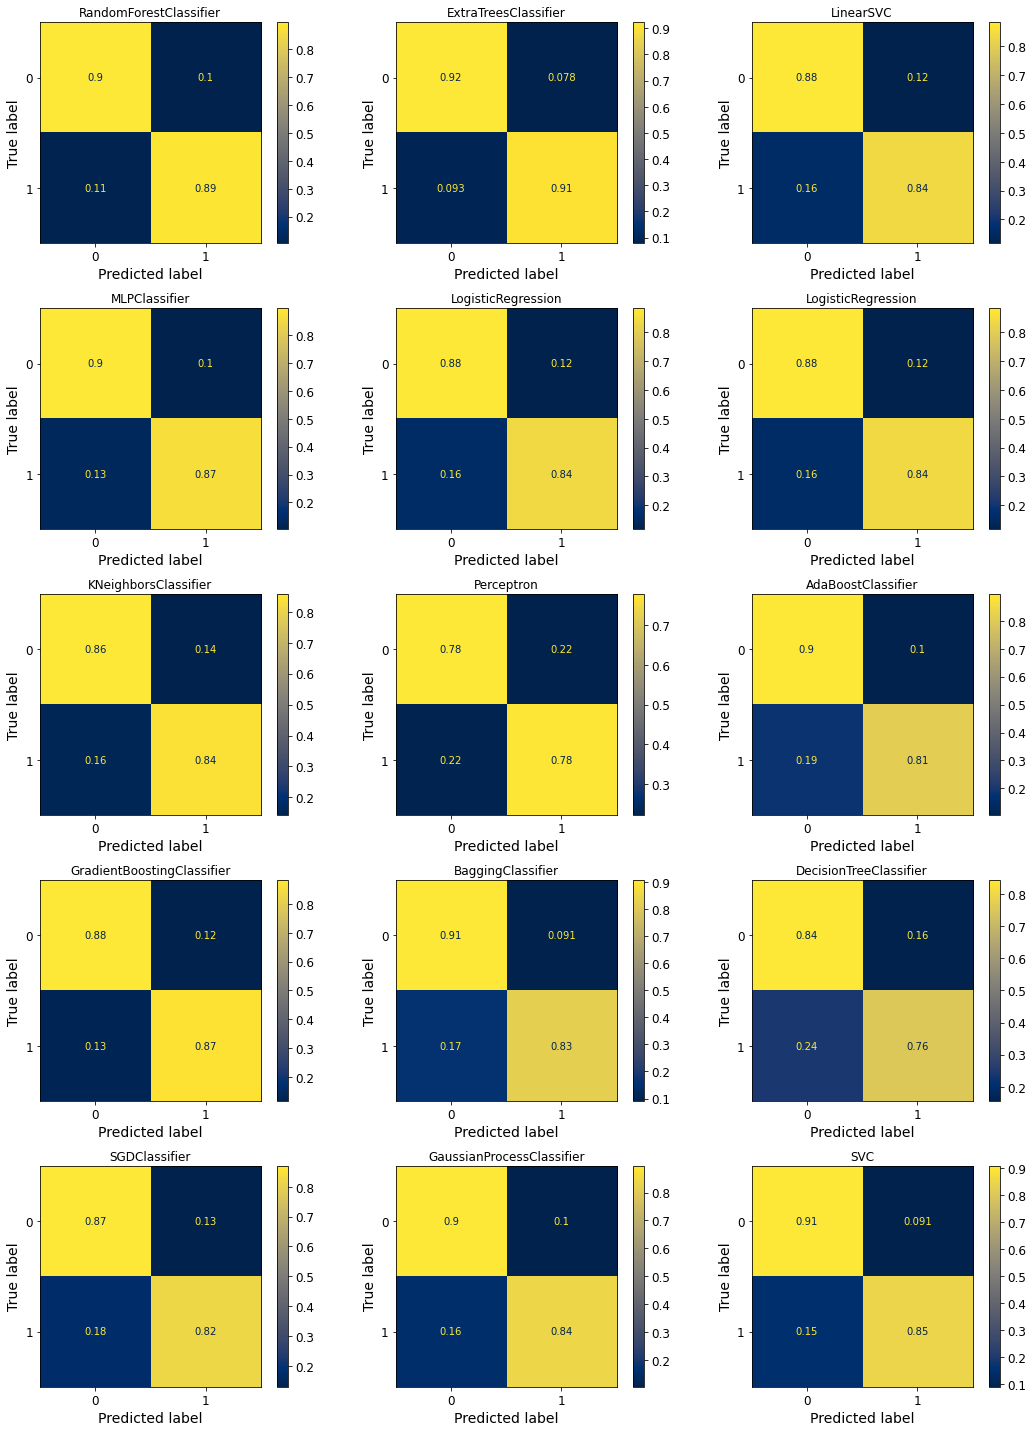

In [187]:
#Confusion Matrices
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(15,20))
from sklearn.metrics import plot_confusion_matrix
for estimator, ax in zip(estimators, axes.flatten()):
    plot_confusion_matrix(estimator, 
                          xtest_tf, 
                          ytest, 
                          ax=ax, 
                          cmap='cividis',
                          normalize='true'
                         )
    ax.title.set_text(type(estimator).__name__)
                          
plt.tight_layout()  
plt.show()

#### 4.1.2 Voting Classifier

Some of the above models performed well (considering that we have not yet fine-tuned any hyperparameter) others...not that great.<br>What we will try to do now, is create a Voting classifier consisting of our best models.

##### Hard Voting

In [251]:
from sklearn.ensemble import VotingClassifier

named_estimators = [
    ("random_forest_clf", random_forest_clf),
    ("extra_trees_clf", extra_trees_clf),
    #("svm_clf",svm_clf),
    #("mlp_clf", mlp_clf),
    #("softmax_reg_clf",softmax_reg_clf),
    #("log_reg_clf", log_reg_clf),
    #("KNeighbors_clf", KNeighbors_clf),
    #("Perceptron_clf", Perceptron_clf),
    #("AdaBoost_clf", AdaBoost_clf),
    ("GradientBoosting_clf", GradientBoosting_clf),
    #("Bagging_clf", Bagging_clf),
    #("tree_clf",tree_clf),
    #("SGDC_clf", SGDC_clf),
    #("GP_clf", GP_clf),
    #("Non_linear_svm_clf", Non_linear_svm_clf)
    
]

In [252]:
voting_clf = VotingClassifier(named_estimators) #Training the voting classifier
voting_clf.fit(xtrain_tf, ytrain)

VotingClassifier(estimators=[('random_forest_clf',
                              RandomForestClassifier(random_state=42)),
                             ('extra_trees_clf',
                              ExtraTreesClassifier(random_state=42)),
                             ('GradientBoosting_clf',
                              GradientBoostingClassifier(random_state=42))])

In [253]:
#cross validation of Hard votin clf
score = cross_val_score(voting_clf, xtrain_tf, ytrain, scoring='f1', cv=cv, n_jobs=-1) #f1: the harmonic mean of sensitivity and precision
print("The Hard Voting classifier cross validated f1-scores on the train set are "+str(score))
print('F1-Score: %.3f ± %.3f' % (np.mean(score), np.std(score))+"\n")

score = cross_val_score(voting_clf, xtrain_tf, ytrain, scoring='accuracy', cv=cv, n_jobs=-1) #f1: the harmonic mean of sensitivity and precision
print("The Hard Voting classifier cross validated accuracy-scores on the train set are "+str(score))
print('Accuracy: %.3f ± %.3f' % (np.mean(score), np.std(score))+"\n")

The Hard Voting classifier cross validated f1-scores on the train set are [0.94047619 0.83229814 0.88372093 0.88050314 0.8496732 ]
F1-Score: 0.877 ± 0.037

The Hard Voting classifier cross validated accuracy-scores on the train set are [0.93197279 0.81632653 0.86394558 0.8707483  0.84246575]
Accuracy: 0.865 ± 0.038



##### Soft Voting

In [254]:
named_estimators_soft = [
    ("random_forest_clf", random_forest_clf),
    ("extra_trees_clf", extra_trees_clf),
    #("svm_clf",svm_clf),
    #("mlp_clf", mlp_clf),
    #("softmax_reg_clf",softmax_reg_clf),
    #("log_reg_clf", log_reg_clf),
    #("KNeighbors_clf", KNeighbors_clf),
    #("Perceptron_clf", Perceptron_clf),
    #("AdaBoost_clf", AdaBoost_clf),
    ("GradientBoosting_clf", GradientBoosting_clf),
    #("Bagging_clf", Bagging_clf),
    #("tree_clf",tree_clf),
    #("SGDC_clf", SGDC_clf),
    #("GP_clf", GP_clf),
    #("Non_linear_svm_clf", Non_linear_svm_clf)
    
]

In [255]:
voting_clf_soft = VotingClassifier(named_estimators_soft, voting='soft') #Training the softvoting classifier
voting_clf_soft.fit(xtrain_tf, ytrain)

VotingClassifier(estimators=[('random_forest_clf',
                              RandomForestClassifier(random_state=42)),
                             ('extra_trees_clf',
                              ExtraTreesClassifier(random_state=42)),
                             ('GradientBoosting_clf',
                              GradientBoostingClassifier(random_state=42))],
                 voting='soft')

In [256]:
score = cross_val_score(voting_clf_soft, xtrain_tf, ytrain, scoring='f1', cv=cv, n_jobs=-1) #f1: the harmonic mean of sensitivity and precision
print("The Soft Voting classifier cross validated f1-scores on the train set are "+str(score))
print('F1-Score: %.3f ± %.3f' % (np.mean(score), np.std(score))+"\n")

score = cross_val_score(voting_clf_soft, xtrain_tf, ytrain, scoring='accuracy', cv=cv, n_jobs=-1)
print("The Soft Voting classifier cross validated accuracy-scores on the train set are "+str(score))
print('Accuracy: %.3f ± %.3f' % (np.mean(score), np.std(score))+"\n")

The Soft Voting classifier cross validated f1-scores on the train set are [0.93413174 0.84662577 0.89534884 0.87341772 0.83870968]
F1-Score: 0.878 ± 0.035

The Soft Voting classifier cross validated accuracy-scores on the train set are [0.92517007 0.82993197 0.87755102 0.86394558 0.82876712]
Accuracy: 0.865 ± 0.036



Now, lets try them with the test set.

In [257]:
print("Classification report of ", voting_clf)
print(classification_report(ytest,voting_clf.predict(xtest_tf)))
print("Classification report of ", voting_clf_soft)
print(classification_report(ytest,voting_clf_soft.predict(xtest_tf)))

Classification report of  VotingClassifier(estimators=[('random_forest_clf',
                              RandomForestClassifier(random_state=42)),
                             ('extra_trees_clf',
                              ExtraTreesClassifier(random_state=42)),
                             ('GradientBoosting_clf',
                              GradientBoostingClassifier(random_state=42))])
              precision    recall  f1-score   support

           0       0.87      0.88      0.88        77
           1       0.92      0.91      0.91       107

    accuracy                           0.90       184
   macro avg       0.89      0.89      0.89       184
weighted avg       0.90      0.90      0.90       184

Classification report of  VotingClassifier(estimators=[('random_forest_clf',
                              RandomForestClassifier(random_state=42)),
                             ('extra_trees_clf',
                              ExtraTreesClassifier(random_state=42)),
      

In [258]:
voters=[voting_clf, voting_clf_soft]
for voter in voters:
    f1_test=f1_score(ytest,estimator.predict(xtest_tf))
    print("The "+str(voter)+" f1-score on the test set is:")
    print("%.3f" % f1_test)

The VotingClassifier(estimators=[('random_forest_clf',
                              RandomForestClassifier(random_state=42)),
                             ('extra_trees_clf',
                              ExtraTreesClassifier(random_state=42)),
                             ('GradientBoosting_clf',
                              GradientBoostingClassifier(random_state=42))]) f1-score on the test set is:
0.888
The VotingClassifier(estimators=[('random_forest_clf',
                              RandomForestClassifier(random_state=42)),
                             ('extra_trees_clf',
                              ExtraTreesClassifier(random_state=42)),
                             ('GradientBoosting_clf',
                              GradientBoostingClassifier(random_state=42))],
                 voting='soft') f1-score on the test set is:
0.888


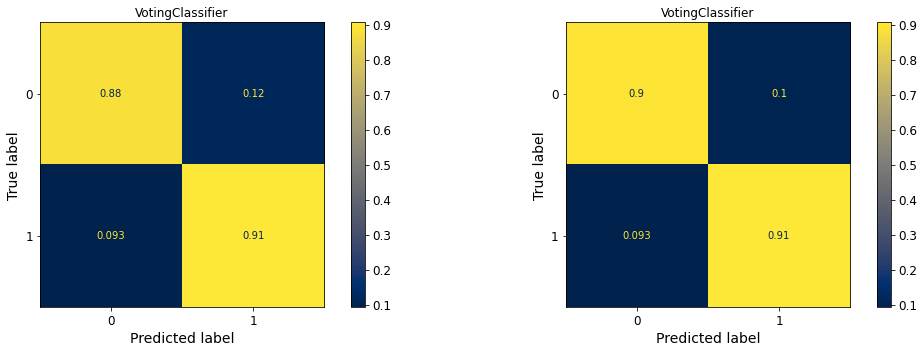

In [259]:

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
from sklearn.metrics import plot_confusion_matrix
for voter, ax in zip(voters, axes.flatten()):
    plot_confusion_matrix(voter, 
                          xtest_tf, 
                          ytest, 
                          ax=ax, 
                          cmap='cividis',
                          normalize='true'
                         )
    ax.title.set_text(type(voter).__name__)
                          
plt.tight_layout()  
plt.show()

### 4.2 Models with fine-tuned hyperparameters

Although our combined model does well, we can try to make it even better by fine-tuning the classifiers' hyperparameters.

#### 4.2.1 Fine-tuning of hyperparameters

In this part we shall implement the means of randomized search cv to efficiently find the best hyperparameters for the models we trained before.<br><br>**WARNING**:This chapter (4.2.1) takes ridiculously long time to run!!! It is strogly suggested to skip it and head directly to chapter 4.2.2 where the computed hyperparameters are used on the models.

In [120]:
from sklearn.model_selection import RandomizedSearchCV

##### Random Forest Classifier

In [121]:
rs_RFC=RandomizedSearchCV(RandomForestClassifier(random_state=42),{
    'n_estimators': range(10,301,1),#the number of trees in the forest (default=100)
    'criterion':['gini', 'entropy'], 
    'max_depth': [None, ] + list(range(1,50,1)),
    'max_features':['auto','sqrt','log2'],
    'max_leaf_nodes': [None, ] + list(range(1,50,1))
},cv=cv, return_train_score=False, n_iter=1000,n_jobs=-1,random_state=42)
rs_RFC.fit(xtrain_tf,ytrain)

KeyboardInterrupt: 

In [45]:
print("best score: ",rs_RFC.best_score_)
print("best parameters: ",rs_RFC.best_params_)

best score:  0.8678221973720996
best parameters:  {'n_estimators': 258, 'max_leaf_nodes': 35, 'max_features': 'log2', 'max_depth': 35, 'criterion': 'entropy'}


##### Extra Trees Classifier

In [46]:
rs_ETC=RandomizedSearchCV(ExtraTreesClassifier(random_state=42),{
    'n_estimators': range(10,301,1),
    'criterion':['gini', 'entropy'], #to measure the quality of a split
    'max_depth': [None, ] + list(range(1,50,1)), #the maximum depth of the tree
    'max_features':['auto', 'sqrt', 'log2'],
    'max_leaf_nodes': [None, ] + list(range(1,50,1))
},cv=cv, return_train_score=False, n_iter=300,random_state=42,scoring='accuracy',n_jobs=-1)

rs_ETC.fit(xtrain_tf,ytrain)


RandomizedSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=ExtraTreesClassifier(random_state=42), n_iter=300,
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [None, 1, 2, 3, 4, 5, 6, 7,
                                                      8, 9, 10, 11, 12, 13, 14,
                                                      15, 16, 17, 18, 19, 20,
                                                      21, 22, 23, 24, 25, 26,
                                                      27, 28, 29, ...],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'max_leaf_nodes': [None, 1, 2, 3, 4, 5,
                                                           6, 7, 8, 9, 10, 11,
                                                         

In [47]:
print("best score: ",rs_ETC.best_score_)
print("best parameters: ",rs_ETC.best_params_)

best score:  0.8637126083310036
best parameters:  {'n_estimators': 71, 'max_leaf_nodes': 45, 'max_features': 'log2', 'max_depth': 35, 'criterion': 'gini'}


##### LinearSVC Classifier

In [144]:
rs_LSVC=RandomizedSearchCV(LinearSVC(random_state=42),{
    'penalty':['l1', 'l2'],
    'loss':['hinge', 'squared_hinge'],
    'dual' :[True, False],
    'C':np.linspace(0.1,20,10000),
    'class_weight':[None, 'dict','balanced'],
    'multi_class': ['ovr', 'crammer_singer'],
    'max_iter': range(700,1500,5),
    'fit_intercept': [True, False]
   }, cv=cv, return_train_score=False, n_jobs=-1 ,n_iter=1000, random_state=42,scoring='accuracy')

rs_LSVC.fit(xtrain_tf,ytrain)

D:\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


RandomizedSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=LinearSVC(random_state=42), n_iter=1000, n_jobs=-1,
                   param_distributions={'C': array([ 0.1      ,  0.1019902,  0.1039804, ..., 19.9960196, 19.9980098,
       20.       ]),
                                        'class_weight': [None, 'dict',
                                                         'balanced'],
                                        'dual': [True, False],
                                        'fit_intercept': [True, False],
                                        'loss': ['hinge', 'squared_hinge'],
                                        'max_iter': range(700, 1500, 5),
                                        'multi_class': ['ovr',
                                                        'crammer_singer'],
                                        'penalty': ['l1', 'l2']},
                   random_state=42, scoring='accuracy')

In [145]:
print("best score: ",rs_LSVC.best_score_)
print("best parameters: ",rs_LSVC.best_params_)

best score:  0.8623520641133166
best parameters:  {'penalty': 'l2', 'multi_class': 'ovr', 'max_iter': 1075, 'loss': 'hinge', 'fit_intercept': True, 'dual': True, 'class_weight': 'balanced', 'C': 1.3558155815581558}


##### MLP Classifier

In [50]:
rs_mplC=RandomizedSearchCV(MLPClassifier(random_state=42),{
                'hidden_layer_sizes': [(100,x) for x in range(100)],
                'solver': ['adam', 'sgd', 'lbfgs'],
                'activation': ['relu', 'tanh', 'logistic', 'identity'],
                'alpha': [0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000,10000],
                'learning_rate': ['constant', 'invscaling', 'adaptive'],
                'early_stopping': [True, False],
                'max_iter': range(100,300)
                     },
                     cv=cv, return_train_score=False, n_jobs=-1,n_iter=100,scoring='accuracy',random_state=42)
rs_mplC.fit(xtrain_tf,ytrain)

D:\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


RandomizedSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=MLPClassifier(random_state=42), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'activation': ['relu', 'tanh',
                                                       'logistic', 'identity'],
                                        'alpha': [1e-05, 0.0001, 0.001, 0.01,
                                                  0.1, 1, 10, 100, 1000,
                                                  10000],
                                        'early_stopping': [True, False],
                                        'hidden_layer_sizes': [(100, 0),
                                                               (100, 1),
                                                               (100, 2),
                                                               (100, 3),
                                                               (100,...
                            

In [51]:
print("best score: ",rs_mplC.best_score_)
print("best parameters: ",rs_mplC.best_params_)

best score:  0.859640294473954
best parameters:  {'solver': 'lbfgs', 'max_iter': 129, 'learning_rate': 'invscaling', 'hidden_layer_sizes': (100, 41), 'early_stopping': True, 'alpha': 10, 'activation': 'relu'}


##### Logistic Regression

In [52]:
from sklearn.model_selection import GridSearchCV

In [53]:
rs_LogR=GridSearchCV(LogisticRegression(random_state=42),{
    'penalty': ['l1','l2', 'elasticnet'],
    'dual':[True, False],
    'C':np.logspace(-1,9,11),
    'solver':['newton-cg', 'lbfgs',  'liblinear', 'sag', 'saga'],
    'multi_class':['auto', 'ovr', 'multinomial'],
    'max_iter':range(50,150),
},cv=cv, return_train_score=False, 
                     #n_iter=20,
                     n_jobs=-1,scoring='accuracy',
                     #random_state=42
                    )

rs_LogR.fit(xtrain_tf,ytrain)


D:\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=LogisticRegression(random_state=42), n_jobs=-1,
             param_grid={'C': array([1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05, 1.e+06,
       1.e+07, 1.e+08, 1.e+09]),
                         'dual': [True, False], 'max_iter': range(50, 150),
                         'multi_class': ['auto', 'ovr', 'multinomial'],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [76]:
print("best score: ",rs_LogR.best_score_)
print("best parameters: ",rs_LogR.best_params_)

best score:  0.8582704314602554
best parameters:  {'C': 10.0, 'dual': True, 'max_iter': 53, 'multi_class': 'auto', 'penalty': 'l2', 'solver': 'liblinear'}


##### K - Nearest Neighbors Classifier

In [55]:
rs_KNC=RandomizedSearchCV(KNeighborsClassifier(n_jobs=-1),{
                    'n_neighbors':range(1,80,1),
                    'weights':['uniform', 'distance'],
                    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                    'leaf_size':np.linspace(1,100,1)
                     },
                     cv=cv, return_train_score=False, n_iter=300,n_jobs=-1,random_state=42,scoring='accuracy')
rs_KNC.fit(xtrain_tf,ytrain)


RandomizedSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=KNeighborsClassifier(n_jobs=-1), n_iter=300,
                   n_jobs=-1,
                   param_distributions={'algorithm': ['auto', 'ball_tree',
                                                      'kd_tree', 'brute'],
                                        'leaf_size': array([1.]),
                                        'n_neighbors': range(1, 80),
                                        'weights': ['uniform', 'distance']},
                   random_state=42, scoring='accuracy')

In [75]:
print("best score: ",rs_KNC.best_score_)
print("best parameters: ",rs_KNC.best_params_)

best score:  0.8637126083310036
best parameters:  {'weights': 'distance', 'n_neighbors': 15, 'leaf_size': 1.0, 'algorithm': 'brute'}


##### Perceptron

In [264]:
rs_pctron=RandomizedSearchCV(Perceptron(random_state=42),{
    'penalty':['l2','l1','elasticnet',None],
    'alpha':np.logspace(-5,1,7), #default=0.0001
    'max_iter':range(500,1500),
    'shuffle':[True, False],
    'class_weight':[None,'dict','balanced'],
    'early_stopping': [True, False],
}, cv=cv, return_train_score=False, n_jobs=-1, n_iter=300,random_state=42,scoring='accuracy')

rs_pctron.fit(xtrain_tf,ytrain)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=Perceptron(random_state=42), n_iter=300, n_jobs=-1,
                   param_distributions={'alpha': array([1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01]),
                                        'class_weight': [None, 'dict',
                                                         'balanced'],
                                        'early_stopping': [True, False],
                                        'max_iter': range(500, 1500),
                                        'penalty': ['l2', 'l1', 'elasticnet',
                                                    None],
                                        'shuffle': [True, False]},
                   random_state=42, scoring='accuracy')

In [269]:
print("best score: ",rs_pctron.best_score_)
print("best parameters: ",rs_pctron.best_params_)

best score:  0.8350573105954708
best parameters:  {'shuffle': True, 'penalty': 'l1', 'max_iter': 1351, 'early_stopping': True, 'class_weight': None, 'alpha': 0.01}


##### Adaptive Boosting Classifier

In [83]:
rs_ABC=RandomizedSearchCV(AdaBoostClassifier(base_estimator=RandomForestClassifier(random_state=42)),{
    'n_estimators': range(5,201,5),#the number of trees in the forest (default=50)
    'algorithm' : ['SAMME','SAMME.R'], 
    'learning_rate':np.linspace(1,10,50),
},cv=cv, return_train_score=False,random_state=42,n_jobs=-1,n_iter=100,scoring='accuracy')
rs_ABC.fit(xtrain_tf,ytrain)


RandomizedSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=AdaBoostClassifier(base_estimator=RandomForestClassifier(random_state=42)),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'algorithm': ['SAMME', 'SAMME.R'],
                                        'learning_rate': array([ 1.        ,  1.18367347,  1.36734694,  1.55102041,  1.73469388,
        1.91836735,  2.10204082,  2.28571429,  2.46938776,  2.653061...
        4.67346939,  4.85714286,  5.04081633,  5.2244898 ,  5.40816327,
        5.59183673,  5.7755102 ,  5.95918367,  6.14285714,  6.32653061,
        6.51020408,  6.69387755,  6.87755102,  7.06122449,  7.24489796,
        7.42857143,  7.6122449 ,  7.79591837,  7.97959184,  8.16326531,
        8.34693878,  8.53061224,  8.71428571,  8.89795918,  9.08163265,
        9.26530612,  9.44897959,  9.63265306,  9.81632653, 10.        ]),
                                        'n_estimators': range(5, 201, 5

In [84]:
print("best score: ",rs_ABC.best_score_)
print("best parameters: ",rs_ABC.best_params_)

best score:  0.8664616531544125
best parameters:  {'n_estimators': 35, 'learning_rate': 5.591836734693878, 'algorithm': 'SAMME'}


##### Gradient Boosting Classifier

In [154]:
rs_GBC=RandomizedSearchCV(GradientBoostingClassifier(random_state=42),{
                    'loss': ['deviance', 'exponential'],#The loss function to be optimized
                    'n_estimators': range(10,400,10),
                    'subsample': np.linspace(0,1,11),
                    'criterion': ['friedman_mse', 'squared_error', 'mse', 'mae'],
                    'max_depth': list(range(1,40,1)),
                    'max_leaf_nodes': range(1,40),
                    'n_iter_no_change':[None, ] + list(range(1,10,1)),
                    'max_features': ['auto', 'sqrt', 'log2']
                     },
                     cv=cv, return_train_score=False, n_jobs=-1, n_iter=300,random_state=42,scoring='accuracy')
rs_GBC.fit(xtrain_tf,ytrain)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=GradientBoostingClassifier(random_state=42),
                   n_iter=1000, n_jobs=-1,
                   param_distributions={'criterion': ['friedman_mse',
                                                      'squared_error', 'mse',
                                                      'mae'],
                                        'loss': ['deviance', 'exponential'],
                                        'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 11, 12, 13, 14, 15,
                                                      16, 17, 18, 19, 20, 21,
                                                      22, 23, 24, 25, 26, 27,
                                                      28, 29, 30, ...],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2']

In [155]:
print("best score: ",rs_GBC.best_score_)
print("best parameters: ",rs_GBC.best_params_)

best score:  0.8705619233994968
best parameters:  {'subsample': 0.30000000000000004, 'n_iter_no_change': None, 'n_estimators': 80, 'max_leaf_nodes': 36, 'max_features': 'log2', 'max_depth': 2, 'loss': 'exponential', 'criterion': 'mse'}


##### Bagging Classifier

In [63]:
rs_BC=RandomizedSearchCV(BaggingClassifier(random_state=42),{
                    'n_estimators': range(0,100),
                    'base_estimator': [RandomForestClassifier(random_state=42)],
                    'bootstrap':[True,False]
                    
                    },
                    
                     cv=cv, return_train_score=False,n_iter=30,n_jobs=-1,random_state=42,scoring='accuracy')
rs_BC.fit(xtrain_tf,ytrain)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=BaggingClassifier(random_state=42), n_iter=30,
                   n_jobs=-1,
                   param_distributions={'base_estimator': [RandomForestClassifier(random_state=42)],
                                        'bootstrap': [True, False],
                                        'n_estimators': range(0, 100)},
                   random_state=42, scoring='accuracy')

In [64]:
print("best score: ",rs_BC.best_score_)
print("best parameters: ",rs_BC.best_params_)

best score:  0.8664523343584009
best parameters:  {'n_estimators': 84, 'bootstrap': True, 'base_estimator': RandomForestClassifier(random_state=42)}


##### Decision Tree Classifier

In [79]:
rs_DTC=RandomizedSearchCV(DecisionTreeClassifier(random_state=42),{
                'criterion': ['gini', 'entropy'],
                'splitter':['best', 'random'],
                'max_depth': [None, ] + list(range(1,60,1)),
                'max_leaf_nodes':[None, ] + list(range(1,60,1)),
                'max_features': ['auto', 'sqrt', 'log2',None],         
},cv=cv, return_train_score=False, n_jobs=-1, n_iter=1000,random_state=42)

rs_DTC.fit(xtrain_tf,ytrain)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=DecisionTreeClassifier(random_state=42),
                   n_iter=1000, n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [None, 1, 2, 3, 4, 5, 6, 7,
                                                      8, 9, 10, 11, 12, 13, 14,
                                                      15, 16, 17, 18, 19, 20,
                                                      21, 22, 23, 24, 25, 26,
                                                      27, 28, 29, ...],
                                        'max_features': ['auto', 'sqrt', 'log2',
                                                         None],
                                        'max_leaf_nodes': [None, 1, 2, 3, 4, 5,
                                                           6, 7, 8, 9, 10, 11,
                                                

In [80]:
print("best score: ",rs_DTC.best_score_)
print("best parameters: ",rs_DTC.best_params_)

best score:  0.8514583915758085
best parameters:  {'splitter': 'random', 'max_leaf_nodes': 57, 'max_features': None, 'max_depth': 6, 'criterion': 'entropy'}


##### Stochastic Gradient Descent Classifier

In [67]:
rs_SGD=RandomizedSearchCV(SGDClassifier(random_state=42),{
                'loss': ['hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron'],
                'penalty': ['l2', 'l1', 'elasticnet'],
                'max_iter':range(700,1300),
                'alpha':np.logspace(-5,5,11),
                'early_stopping':[True,False],
                'shuffle':[True,False],
                'fit_intercept': [True,False],
                'eta0':range(1,10),
                'learning_rate': ['constant','optimal','invscaling','adaptive']
},cv=cv, return_train_score=False, n_jobs=-1, n_iter=2000,random_state=42,scoring='accuracy')

rs_SGD.fit(xtrain_tf,ytrain)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=SGDClassifier(random_state=42), n_iter=2000,
                   n_jobs=-1,
                   param_distributions={'alpha': array([1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02,
       1.e+03, 1.e+04, 1.e+05]),
                                        'early_stopping': [True, False],
                                        'eta0': range(1, 10),
                                        'fit_intercept': [True, False],
                                        'learning_rate': ['constant', 'optimal',
                                                          'invscaling',
                                                          'adaptive'],
                                        'loss': ['hinge', 'log',
                                                 'modified_huber',
                                                 'squared_hinge',
                                          

In [68]:
print("best score: ",rs_SGD.best_score_)
print("best parameters: ",rs_SGD.best_params_)

best score:  0.8582797502562668
best parameters:  {'shuffle': False, 'penalty': 'l1', 'max_iter': 1210, 'loss': 'hinge', 'learning_rate': 'adaptive', 'fit_intercept': True, 'eta0': 3, 'early_stopping': False, 'alpha': 0.01}


##### Gaussian Procces Classifier

In [69]:
rs_GP=RandomizedSearchCV(GaussianProcessClassifier(random_state=42),{
                'multi_class': ['one_vs_rest', 'one_vs_one'],
                'max_iter_predict': range(50,200),
                'n_restarts_optimizer': range(0,10),
                
},cv=cv, return_train_score=False, n_jobs=-1, n_iter=180,random_state=42,scoring='accuracy')

rs_GP.fit(xtrain_tf,ytrain)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=GaussianProcessClassifier(random_state=42),
                   n_iter=180, n_jobs=-1,
                   param_distributions={'max_iter_predict': range(50, 200),
                                        'multi_class': ['one_vs_rest',
                                                        'one_vs_one'],
                                        'n_restarts_optimizer': range(0, 10)},
                   random_state=42, scoring='accuracy')

In [70]:
print("best score: ",rs_GP.best_score_)
print("best parameters: ",rs_GP.best_params_)

best score:  0.8337247227658187
best parameters:  {'n_restarts_optimizer': 1, 'multi_class': 'one_vs_rest', 'max_iter_predict': 140}


##### Non-Linear SVM Classifier

In [137]:
rs_SVC=RandomizedSearchCV(SVC(random_state=42),{
                'C':np.linspace(0,1,10000),
                'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
                'degree': range(1,10),
                'gamma': ['scale','auto'],
                
},cv=cv, return_train_score=False, n_jobs=-1, n_iter=5000,random_state=42)

rs_SVC.fit(xtrain_tf,ytrain)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=SVC(random_state=42), n_iter=5000, n_jobs=-1,
                   param_distributions={'C': array([0.00000000e+00, 1.00010001e-04, 2.00020002e-04, ...,
       9.99799980e-01, 9.99899990e-01, 1.00000000e+00]),
                                        'degree': range(1, 10),
                                        'gamma': ['scale', 'auto'],
                                        'kernel': ['linear', 'poly', 'rbf',
                                                   'sigmoid']},
                   random_state=42)

In [138]:
print("best score: ",rs_SVC.best_score_)
print("best parameters: ",rs_SVC.best_params_)

best score:  0.861000838691641
best parameters:  {'kernel': 'rbf', 'gamma': 'auto', 'degree': 8, 'C': 0.16931693169316933}


#### 4.2.2 Fine-Tuned Models' Training and evaluation

From now on, we will follow the same procces as in chapter 4.1 exept we will use the hyperparameters we computed in chapter 4.2.1

In [270]:
random_forest_clfF = RandomForestClassifier(n_estimators=258,max_leaf_nodes=35,max_features='log2',max_depth=35,criterion='entropy',random_state=42) #define classifiers
extra_trees_clfF = ExtraTreesClassifier(n_estimators=71,max_leaf_nodes=45,max_features='log2',max_depth=35,criterion='gini', random_state=42)    
svm_clfF = LinearSVC(penalty='l2', multi_class='ovr',max_iter=1075,loss='hinge',fit_intercept=True,dual=True,class_weight='balanced',C=1.3558155815581558, random_state=42)
mlp_clfF = MLPClassifier(solver='lbfgs',max_iter=129,learning_rate='invscaling',hidden_layer_sizes=(100,41),early_stopping=True,alpha=10,activation='relu',random_state=42)
softmax_reg_clfF = LogisticRegression(multi_class="multinomial", solver="lbfgs",C=10.0,dual=False,max_iter=53,penalty='l2', random_state=42)
KNeighbors_clfF=KNeighborsClassifier(weights='distance',n_neighbors=15,leaf_size=1.0,algorithm='brute',n_jobs=-1)
Perceptron_clfF=Perceptron(random_state=42,shuffle=True,penalty='l1',max_iter=1351,early_stopping=True,class_weight=None,alpha=0.01)
AdaBoost_clfF=AdaBoostClassifier(base_estimator=RandomForestClassifier(random_state=42),n_estimators=175, learning_rate=3.5714285714285716 ,random_state=42,algorithm='SAMME')
GradientBoosting_clfF=GradientBoostingClassifier(subsample=0.9,n_iter_no_change=None,n_estimators=300,max_leaf_nodes=4,max_features='sqrt',max_depth=36,loss='exponential',criterion='mae',random_state=42)
Bagging_clfF=BaggingClassifier(n_estimators=84,base_estimator=RandomForestClassifier(random_state=42),bootstrap=True,random_state=42)
tree_clfF=DecisionTreeClassifier(splitter='random',max_leaf_nodes=57,max_features=None,max_depth=6,criterion='entropy',random_state=42)
log_reg_clfF = LogisticRegression(solver='liblinear',C=10.0,dual=True,max_iter=53,multi_class='auto',penalty='l2', random_state=42)
SGDC_clfF=SGDClassifier(shuffle=False,penalty='l1',max_iter=1210,loss='hinge',learning_rate='adaptive',fit_intercept=True,eta0=3,early_stopping=False,alpha=0.01,random_state=42)
GP_clfF=GaussianProcessClassifier(n_restarts_optimizer=1,multi_class='one_vs_rest',max_iter_predict=140,random_state=42)
Non_linear_svm_clfF=SVC(kernel="rbf",gamma='auto',degree=8,C=0.16931693169316933,probability=True, random_state=42)

In [271]:
estimatorsF = [random_forest_clfF,
              extra_trees_clfF,
              svm_clfF, 
              mlp_clfF,
              softmax_reg_clfF,
              log_reg_clfF,
              KNeighbors_clfF,
              Perceptron_clfF, 
              AdaBoost_clfF, 
              GradientBoosting_clfF, 
              Bagging_clfF, 
              tree_clfF, 
              SGDC_clfF, 
              GP_clfF,
              Non_linear_svm_clfF
             ] #array of classifiers
for estimatorF in estimatorsF:
    print("Training the", estimatorF)
    estimatorF.fit(xtrain_tf, ytrain)

Training the RandomForestClassifier(criterion='entropy', max_depth=35, max_features='log2',
                       max_leaf_nodes=35, n_estimators=258, random_state=42)
Training the ExtraTreesClassifier(max_depth=35, max_features='log2', max_leaf_nodes=45,
                     n_estimators=71, random_state=42)
Training the LinearSVC(C=1.3558155815581558, class_weight='balanced', loss='hinge',
          max_iter=1075, random_state=42)
Training the MLPClassifier(alpha=10, early_stopping=True, hidden_layer_sizes=(100, 41),
              learning_rate='invscaling', max_iter=129, random_state=42,
              solver='lbfgs')


D:\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
D:\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Training the LogisticRegression(C=10.0, max_iter=53, multi_class='multinomial',
                   random_state=42)
Training the LogisticRegression(C=10.0, dual=True, max_iter=53, random_state=42,
                   solver='liblinear')
Training the KNeighborsClassifier(algorithm='brute', leaf_size=1.0, n_jobs=-1,
                     n_neighbors=15, weights='distance')
Training the Perceptron(alpha=0.01, early_stopping=True, max_iter=1351, penalty='l1',
           random_state=42)
Training the AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=RandomForestClassifier(random_state=42),
                   learning_rate=3.5714285714285716, n_estimators=175,
                   random_state=42)
Training the GradientBoostingClassifier(criterion='mae', loss='exponential', max_depth=36,
                           max_features='sqrt', max_leaf_nodes=4,
                           n_estimators=300, random_state=42, subsample=0.9)
Training the BaggingClassifier(base_estimator=R

In [272]:
for estimatorF in estimatorsF: #cross validation of all individual classifiers
    score = cross_val_score(estimatorF, xtrain_tf, ytrain, scoring='f1', cv=cv, n_jobs=-1) #f1: the harmonic mean of sensitivity and precision
    print("The "+str(estimatorF)+" cross validated scores on the train set are "+str(score))
    print('F1-Score: %.3f ± %.3f' % (np.mean(score), np.std(score)))
    score = cross_val_score(estimatorF, xtrain_tf, ytrain, scoring='accuracy', cv=cv, n_jobs=-1)
    print('Accuracy: %.3f ± %.3f' % (np.mean(score), np.std(score))+"\n")

The RandomForestClassifier(criterion='entropy', max_depth=35, max_features='log2',
                       max_leaf_nodes=35, n_estimators=258, random_state=42) cross validated scores on the train set are [0.92941176 0.8502994  0.89017341 0.88198758 0.85897436]
F1-Score: 0.882 ± 0.028
Accuracy: 0.868 ± 0.029

The ExtraTreesClassifier(max_depth=35, max_features='log2', max_leaf_nodes=45,
                     n_estimators=71, random_state=42) cross validated scores on the train set are [0.92397661 0.84848485 0.88757396 0.8875     0.83870968]
F1-Score: 0.877 ± 0.031
Accuracy: 0.864 ± 0.031

The LinearSVC(C=1.3558155815581558, class_weight='balanced', loss='hinge',
          max_iter=1075, random_state=42) cross validated scores on the train set are [0.92215569 0.82716049 0.88757396 0.8961039  0.83870968]
F1-Score: 0.874 ± 0.036
Accuracy: 0.862 ± 0.038

The MLPClassifier(alpha=10, early_stopping=True, hidden_layer_sizes=(100, 41),
              learning_rate='invscaling', max_iter=129, rand

Now, we will see how the classifiers perform on the test set.

In [273]:
for estimatorF in estimatorsF:#classification reports
    print("Classification report of ", estimatorF)
    print(classification_report(ytest,estimator.predict(xtest_tf)))

Classification report of  RandomForestClassifier(criterion='entropy', max_depth=35, max_features='log2',
                       max_leaf_nodes=35, n_estimators=258, random_state=42)
              precision    recall  f1-score   support

           0       0.81      0.91      0.86        77
           1       0.93      0.85      0.89       107

    accuracy                           0.88       184
   macro avg       0.87      0.88      0.87       184
weighted avg       0.88      0.88      0.88       184

Classification report of  ExtraTreesClassifier(max_depth=35, max_features='log2', max_leaf_nodes=45,
                     n_estimators=71, random_state=42)
              precision    recall  f1-score   support

           0       0.81      0.91      0.86        77
           1       0.93      0.85      0.89       107

    accuracy                           0.88       184
   macro avg       0.87      0.88      0.87       184
weighted avg       0.88      0.88      0.88       184

Classifi

In [274]:
for estimatorF in estimatorsF:
    f1_test=f1_score(ytest,estimatorF.predict(xtest_tf))
    print("The "+str(estimatorF)+" f1-score on the test set is:")
    print("%.3f" % f1_test)

The RandomForestClassifier(criterion='entropy', max_depth=35, max_features='log2',
                       max_leaf_nodes=35, n_estimators=258, random_state=42) f1-score on the test set is:
0.901
The ExtraTreesClassifier(max_depth=35, max_features='log2', max_leaf_nodes=45,
                     n_estimators=71, random_state=42) f1-score on the test set is:
0.900
The LinearSVC(C=1.3558155815581558, class_weight='balanced', loss='hinge',
          max_iter=1075, random_state=42) f1-score on the test set is:
0.863
The MLPClassifier(alpha=10, early_stopping=True, hidden_layer_sizes=(100, 41),
              learning_rate='invscaling', max_iter=129, random_state=42,
              solver='lbfgs') f1-score on the test set is:
0.890
The LogisticRegression(C=10.0, max_iter=53, multi_class='multinomial',
                   random_state=42) f1-score on the test set is:
0.874
The LogisticRegression(C=10.0, dual=True, max_iter=53, random_state=42,
                   solver='liblinear') f1-score on th

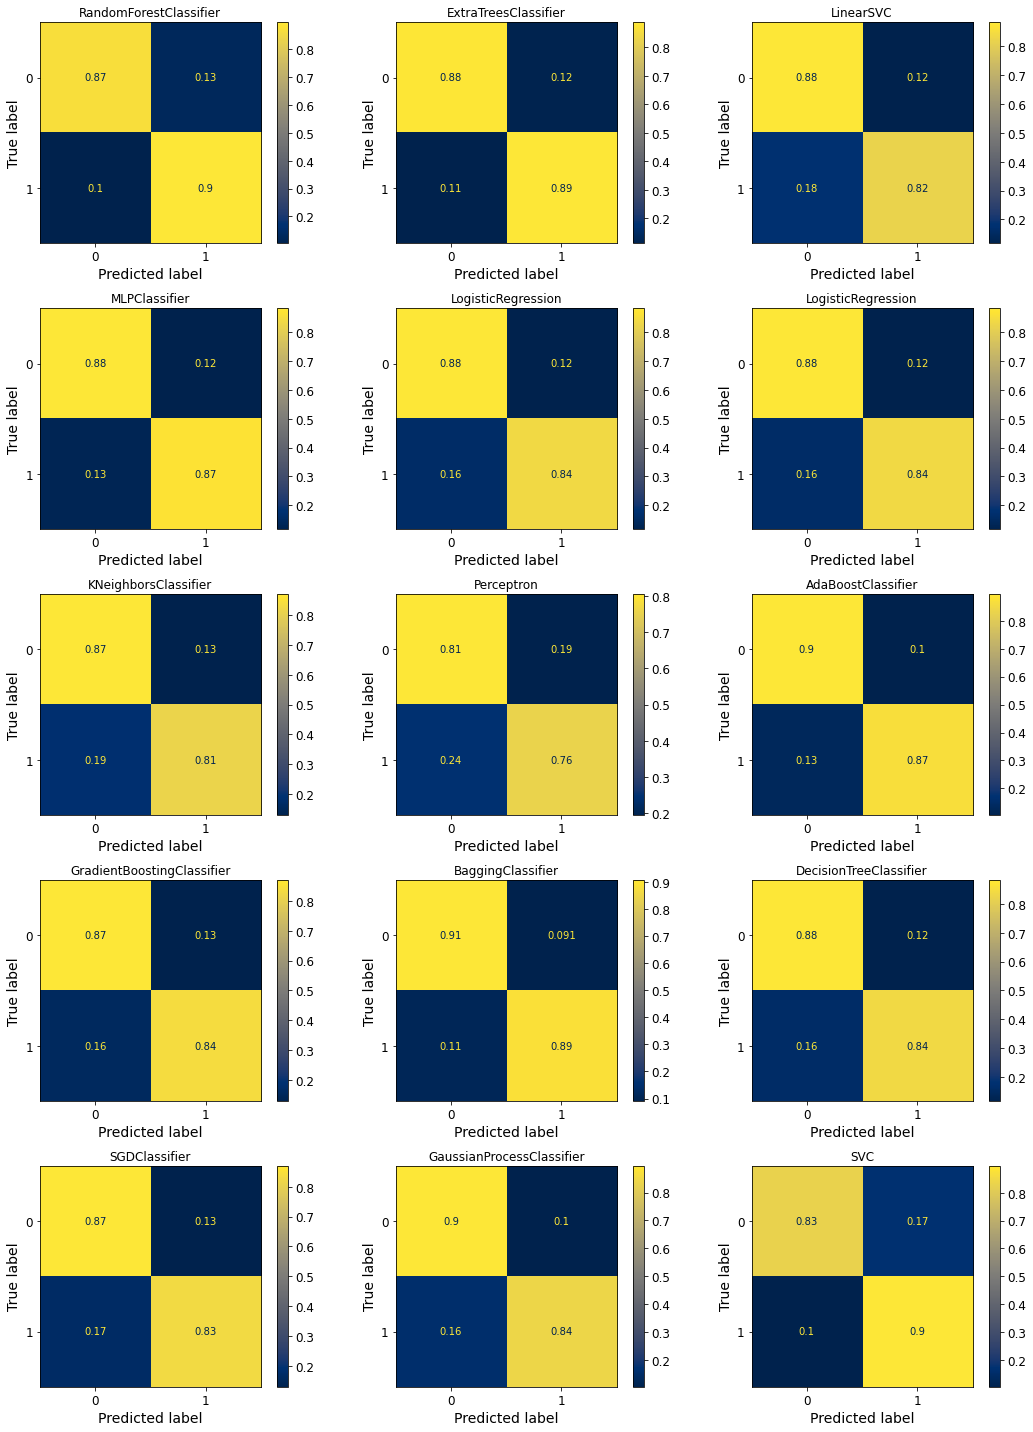

In [161]:
#Confusion Matrices
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(15,20))
from sklearn.metrics import plot_confusion_matrix
for estimatorF, ax in zip(estimatorsF, axes.flatten()):
    plot_confusion_matrix(estimatorF, 
                          xtest_tf, 
                          ytest, 
                          ax=ax, 
                          cmap='cividis',
                          normalize='true'
                         )
    ax.title.set_text(type(estimatorF).__name__)
                          
plt.tight_layout()  
plt.show()

#### 4.2.3 Fine-Tuned Voting Classifier

Some of the above models performed well (considering that we have not yet fine-tuned any hyperparameter) others...not that great.<br>What we will try to do now, is create a Voting classifier consisting of our best models.

##### Hard Voting

In [276]:
from sklearn.ensemble import VotingClassifier

named_estimatorsF = [
    ("random_forest_clfF", random_forest_clfF),
    ("extra_trees_clfF", extra_trees_clfF),
    #("svm_clfF",svm_clfF),
    #("mlp_clfF", mlp_clfF),
    #("softmax_reg_clfF",softmax_reg_clfF),
    #("log_reg_clfF", log_reg_clfF),
    #("KNeighbors_clfF", KNeighbors_clfF),
    #("Perceptron_clfF", Perceptron_clfF),
    ("AdaBoost_clfF", AdaBoost_clfF),
    ("GradientBoosting_clfF", GradientBoosting_clfF),
    ("Bagging_clfF", Bagging_clfF),
    #("tree_clfF",tree_clfF),
    #("SGDC_clfF", SGDC_clfF),
    #("GP_clfF", GP_clfF),
    ("Non_linear_svm_clfF", Non_linear_svm_clfF)
    
]

In [277]:
voting_clfF = VotingClassifier(named_estimatorsF,n_jobs=-1) #Training the voting classifier
voting_clfF.fit(xtrain_tf, ytrain)

VotingClassifier(estimators=[('random_forest_clfF',
                              RandomForestClassifier(criterion='entropy',
                                                     max_depth=35,
                                                     max_features='log2',
                                                     max_leaf_nodes=35,
                                                     n_estimators=258,
                                                     random_state=42)),
                             ('extra_trees_clfF',
                              ExtraTreesClassifier(max_depth=35,
                                                   max_features='log2',
                                                   max_leaf_nodes=45,
                                                   n_estimators=71,
                                                   random_state=42)),
                             ('AdaBoost_clfF',
                              AdaBoostClassifier(algorith...
               

In [278]:
#cross validation of Hard votin clf
score = cross_val_score(voting_clfF, xtrain_tf, ytrain, scoring='f1', cv=cv, n_jobs=-1) #f1: the harmonic mean of sensitivity and precision
print("The Hard Voting classifier cross validated f1-score on the train set are "+str(score))
print('F1-Score: %.3f ± %.3f' % (np.mean(score), np.std(score))+"\n")

score = cross_val_score(voting_clfF, xtrain_tf, ytrain, scoring='accuracy', cv=cv, n_jobs=-1) #f1: the harmonic mean of sensitivity and precision
print("The Hard Voting classifier cross validated accuracy-score on the train set are "+str(score))
print('Accuracy: %.3f ± %.3f' % (np.mean(score), np.std(score))+"\n")

The Hard Voting classifier cross validated f1-score on the train set are [0.92941176 0.84848485 0.9005848  0.8875     0.8516129 ]
F1-Score: 0.884 ± 0.031

The Hard Voting classifier cross validated accuracy-score on the train set are [0.91836735 0.82993197 0.88435374 0.87755102 0.84246575]
Accuracy: 0.871 ± 0.032



##### Soft Voting

In [279]:
named_estimators_softF = [
    ("random_forest_clfF", random_forest_clfF),
    ("extra_trees_clfF", extra_trees_clfF),
    #("svm_clfF",svm_clfF),
    #("mlp_clfF", mlp_clfF),
    #("softmax_reg_clfF",softmax_reg_clfF),
    #("log_reg_clfF", log_reg_clfF),
    #("KNeighbors_clfF", KNeighbors_clfF),
    #("Perceptron_clfF", Perceptron_clfF),
    #("AdaBoost_clfF", AdaBoost_clfF),
    ("GradientBoosting_clfF", GradientBoosting_clfF),
    ("Bagging_clfF", Bagging_clfF),
    #("tree_clfF",tree_clfF),
    #("SGDC_clfF", SGDC_clfF),
    #("GP_clfF", GP_clfF),
    ("Non_linear_svm_clfF", Non_linear_svm_clfF)
    
]

In [280]:
voting_clf_softF = VotingClassifier(named_estimators_softF, voting='soft') #Training the softvoting classifier
voting_clf_softF.fit(xtrain_tf, ytrain)

VotingClassifier(estimators=[('random_forest_clfF',
                              RandomForestClassifier(criterion='entropy',
                                                     max_depth=35,
                                                     max_features='log2',
                                                     max_leaf_nodes=35,
                                                     n_estimators=258,
                                                     random_state=42)),
                             ('extra_trees_clfF',
                              ExtraTreesClassifier(max_depth=35,
                                                   max_features='log2',
                                                   max_leaf_nodes=45,
                                                   n_estimators=71,
                                                   random_state=42)),
                             ('GradientBoosting_clfF',
                              GradientBoostingCla...
               

In [281]:
score = cross_val_score(voting_clf_softF, xtrain_tf, ytrain, scoring='f1', cv=cv, n_jobs=-1) #f1: the harmonic mean of sensitivity and precision
print("The Soft Voting classifier cross validated f1-scores on the train set are "+str(score))
print('F1-Score: %.3f ± %.3f' % (np.mean(score), np.std(score))+"\n")

score = cross_val_score(voting_clf_softF, xtrain_tf, ytrain, scoring='accuracy', cv=cv, n_jobs=-1)
print("The Soft Voting classifier cross validated accuracy-scores on the train set are "+str(score))
print('Accuracy: %.3f ± %.3f' % (np.mean(score), np.std(score))+"\n")

The Soft Voting classifier cross validated f1-scores on the train set are [0.92397661 0.84848485 0.89655172 0.875      0.84810127]
F1-Score: 0.878 ± 0.029

The Soft Voting classifier cross validated accuracy-scores on the train set are [0.91156463 0.82993197 0.87755102 0.86394558 0.83561644]
Accuracy: 0.864 ± 0.030



Now, lets try them with the test set.

In [283]:
print("Classification report of ", voting_clfF)
print(classification_report(ytest,voting_clfF.predict(xtest_tf)))
print("Classification report of ", voting_clf_softF)
print(classification_report(ytest,voting_clf_softF.predict(xtest_tf)))

Classification report of  VotingClassifier(estimators=[('random_forest_clfF',
                              RandomForestClassifier(criterion='entropy',
                                                     max_depth=35,
                                                     max_features='log2',
                                                     max_leaf_nodes=35,
                                                     n_estimators=258,
                                                     random_state=42)),
                             ('extra_trees_clfF',
                              ExtraTreesClassifier(max_depth=35,
                                                   max_features='log2',
                                                   max_leaf_nodes=45,
                                                   n_estimators=71,
                                                   random_state=42)),
                             ('AdaBoost_clfF',
                              AdaBoostClassifier(a

In [284]:
votersF=[voting_clfF, voting_clf_softF]
for voterF in votersF:
    f1_test=f1_score(ytest,voterF.predict(xtest_tf))
    print("The "+str(voterF)+" f1-score on the test set is:")
    print("%.3f" % f1_test)

The VotingClassifier(estimators=[('random_forest_clfF',
                              RandomForestClassifier(criterion='entropy',
                                                     max_depth=35,
                                                     max_features='log2',
                                                     max_leaf_nodes=35,
                                                     n_estimators=258,
                                                     random_state=42)),
                             ('extra_trees_clfF',
                              ExtraTreesClassifier(max_depth=35,
                                                   max_features='log2',
                                                   max_leaf_nodes=45,
                                                   n_estimators=71,
                                                   random_state=42)),
                             ('AdaBoost_clfF',
                              AdaBoostClassifier(algorith...
           

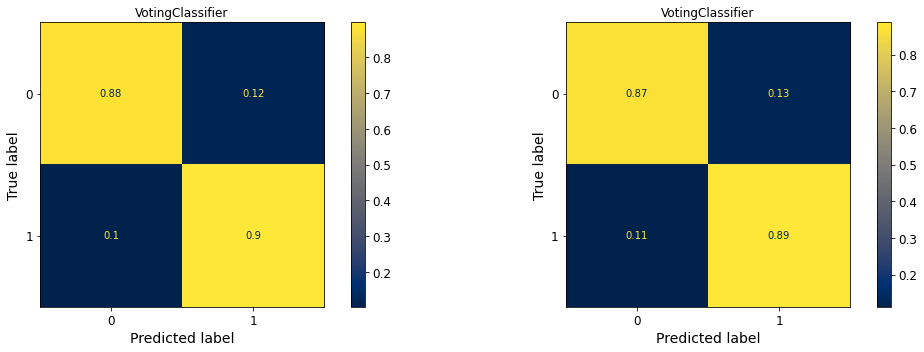

In [302]:

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
from sklearn.metrics import plot_confusion_matrix
for voterF, ax in zip(votersF, axes.flatten()):
    plot_confusion_matrix(voterF, 
                          xtest_tf, 
                          ytest, 
                          ax=ax, 
                          cmap='cividis',
                          normalize='true'
                         )
    ax.title.set_text(type(voterF).__name__)
                          
plt.tight_layout()  
plt.show()

## 5. Conclusion

In this project we managed to train various classifiers to predict if a patient
is at high risk of suffering from hear disease, based on 11 clinical and personal
features.<br>
The models we trained, in general, managed to do well in the test set with an
average accuracy, for our good models, of 90%. Notably, the tree based ensembles, seem to perform particularly good in the dataset as it can be seen on the
relative confusion matrices.

# THE END!